In [1]:
from DQN.train import train
from DQN.DQN_agent import Agent
from DQN.model import Model

from shared.memory_manager import MemoryManager

import torch
import torch.optim as optim

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration

import numpy as np
import matplotlib.pyplot as plt

Loading environment football failed: No module named 'gfootball'


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

memory_manager = MemoryManager(-1, 0.99)

model = Model()
model.set_config(Configuration({"columns": 11, "rows": 7}))

#model.load_state_dict(torch.load("DQN/model"))
model.eval()

model.to(device)

#optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer.load_state_dict(torch.load("DQN/opzimizer"))

def epsilon(iteration):
    return 0.05

def greedy(iteration):
    return 0

agent = Agent(model, epsilon)
agent.model.device = device


cuda


In [8]:
params = {}
params["sampeling_count"] = 1
params["batch_size"] = 50
params["training_time"] = 20000

# opponents = ["main.py", "main.py", "main.py"]
opponents = ["greedy", "greedy", "greedy"]
env = make("hungry_geese", debug=False)

trainer = env.train([None, *opponents])


#agent.epsilon = greedy


In [9]:
rewards, best_params = train(agent, memory_manager, optimizer, device, trainer, params)

 (74), SOUTH: 1.30% (1), WEST: 0.00% (0), 
Current Iteration 1917/2000, 95.85% 
5248.853823165292
loss tensor(241578.7188, device='cuda:0', grad_fn=<AddBackward0>)

survived: False, others alive: 2, timesteps: 19
NORTH: 0.00% (0), EAST: 100.00% (19), SOUTH: 0.00% (0), WEST: 0.00% (0), 
Current Iteration 1918/2000, 95.90% 
1401.9794274839455
loss tensor(12875.8623, device='cuda:0', grad_fn=<AddBackward0>)

survived: False, others alive: 2, timesteps: 31
NORTH: 0.00% (0), EAST: 100.00% (31), SOUTH: 0.00% (0), WEST: 0.00% (0), 
Current Iteration 1919/2000, 95.95% 
2379.670806441552
loss tensor(20098.4668, device='cuda:0', grad_fn=<AddBackward0>)

survived: False, others alive: 3, timesteps: 2
NORTH: 0.00% (0), EAST: 100.00% (2), SOUTH: 0.00% (0), WEST: 0.00% (0), 
Current Iteration 1920/2000, 96.00% 
-300
loss tensor(1779.8436, device='cuda:0', grad_fn=<AddBackward0>)

survived: False, others alive: 3, timesteps: 29
NORTH: 0.00% (0), EAST: 89.66% (26), SOUTH: 10.34% (3), WEST: 0.00% (0), 

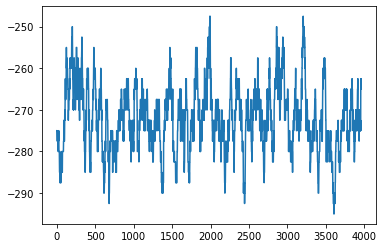

In [10]:

N = int(len(memory_manager.rewards) / 100)
plt.plot(np.convolve(memory_manager.rewards, np.ones(N)/N, mode='valid'))


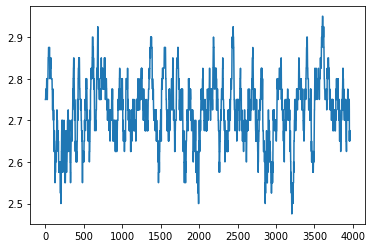

In [11]:

plt.plot(np.convolve(memory_manager.places, np.ones(N)/N, mode='valid'))

In [7]:
torch.save(model.state_dict(), "DQN/model")
torch.save(optimizer.state_dict(), "DQN/opzimizer")

!tar -czvf submission.tar.gz main.py DQN/model DQN/DQN_agent.py DQN/model.py shared/map.py


a main.py
a DQN/model
a DQN/DQN_agent.py
a DQN/model.py
a shared/map.py
